# Setup
run whole section

do **not** get into the code (you can do it later if you wish)

In [1]:
!pip install plotly_express

In [2]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.3
aiohttp                            3.11.2
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.6
astropy-iers-data                  0.2024.11.18.0.35.2
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           

In [3]:
import plotly_express as px  #https://plotly.com/python/line-and-scatter/

# Pipeline

## Data

### Create datasets

In [4]:
from sklearn.datasets import make_classification, make_circles, make_moons
import pandas as pd

In [5]:
# X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
#                            n_classes=2,
#                            n_clusters_per_class=1, flip_y=0.1)
# X, y = make_circles(noise=0.1)
X, y = make_moons(n_samples=1000, noise=0.2)

In [6]:
type(X)

numpy.ndarray

In [7]:
df_make_moons = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df_make_moons['target'] = y

In [8]:
df_make_moons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1000 non-null   float64
 1   feature_2  1000 non-null   float64
 2   target     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### EDA / visualize

In [10]:
import plotly_express as px

In [11]:
px.scatter(df_make_moons, x='feature_1', y='feature_2', color='target')

## Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [13]:
model = SVC(kernel='rbf', probability=True)

In [14]:
model.fit(X_train, y_train)

SVC(probability=True)

In [15]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Evaluation & Analysis

In [16]:
from sklearn.metrics import classification_report

### Evaluation

In [17]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       402
           1       0.96      0.96      0.96       398

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



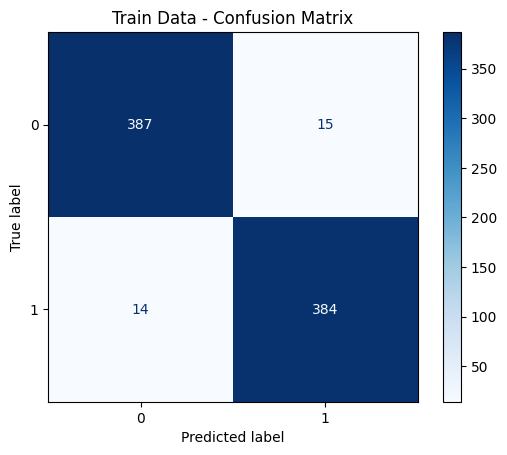

In [18]:
# Plot the confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Train Data - Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.97      1.00      0.99       102

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



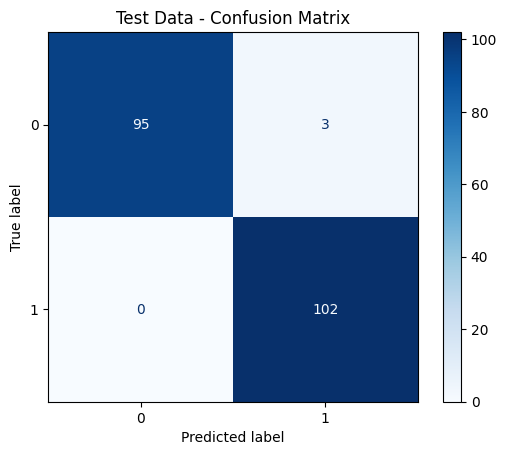

In [20]:
# Plot the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Test Data - Confusion Matrix')
plt.show()

Is there a significant difference between train and test?

### Visual analysis

In [21]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

def plot_with_decision_boundary(model, X, y=None, xlabel='x', ylabel='y'):
    """
    Plots decision boundary for a trained model using DecisionBoundaryDisplay.

    Parameters:
    - model: Trained classifier supporting `predict` or `predict_proba`.
    - X: 2D input data (n_samples, 2).
    - y: (Optional) Target labels for coloring the scatter plot.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    """
    if X.shape[1] != 2:
        raise ValueError("Input data X must have exactly 2 features.")

    # Plot the decision boundary
    display = DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict_proba", cmap="RdBu", alpha=0.8
    )

    # Scatter plot of the data points
    if y is not None:
        # Choose contrasting colors for points
        point_colors = ["yellow" if label == 1 else "black" for label in y]
        plt.scatter(
            X[:, 0], X[:, 1], c=point_colors, edgecolor="white", s=50, linewidth=1.5
        )

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Decision Boundary")
    plt.show()


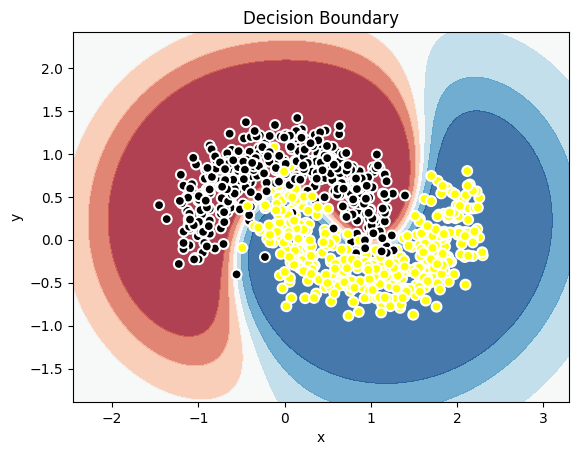

In [22]:
plot_with_decision_boundary(model, X_train, y_train)

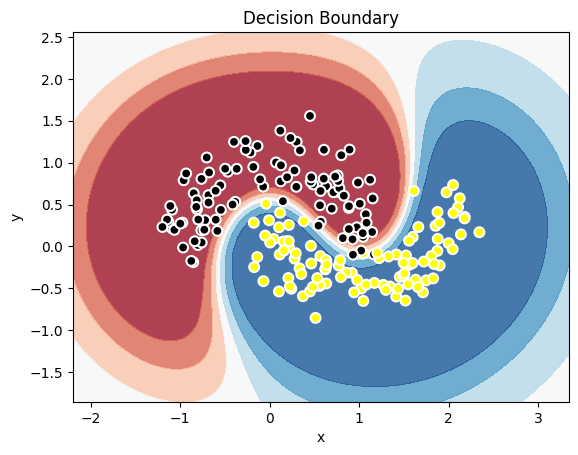

In [23]:
plot_with_decision_boundary(model, X_test, y_test)

Is there a significant difference between train and test?

# Your turn!

### 1. experience with different models

- Keep working with the same dataset.
- Try different models (LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVM with different kernel)
- How do they perform on the dataset
- Which model performs best? Conduct a comprehensive evaluation based on all the parameters and metrics we have learned.
- Do you understand why?



<font size=3 color='red'><b>Instruction:</b></font> Define and fit at least five different models that you will use for comparison. Make sure to include:

- One Logistic Regression model.
- One k-Nearest Neighbors (kNN) model.
- One Decision Tree model.
- One Random Forest model.
- One Support Vector Machine (SVM) model.

In [24]:
logistic_regression_model  = LogisticRegression(penalty='l2', C=2.0)
knn_model  = KNeighborsClassifier(n_neighbors=3)
decision_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
random_forest_model = RandomForestClassifier(n_estimators=10, max_depth=5)
svc_model = SVC(kernel='sigmoid', coef0=1, probability=True)

models_list = [logistic_regression_model, knn_model, decision_tree_model, random_forest_model, svc_model]
# Fit the model
for model in models_list:
    model.fit(X_train, y_train)


<font size=3 color='red'><b>Instruction:</b></font> Create a function named evaluate_model that evaluates a given model's performance on both training and test datasets. This function should:

Generate predictions for both training and test data.
Calculate and display the following evaluation metrics:
Classification Report: Includes precision, recall, F1-score.
Accuracy: Overall accuracy of the model on test data.
F1 Score: Weighted F1 score on the test data.
Plot Confusion Matrices for both training and test data to visualize model performance.

In [25]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
)
import matplotlib.pyplot as plt

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    """
    Evaluates a given model on training and test data and plots confusion matrices.

    Parameters:
    - model: The machine learning model to evaluate (must implement `fit` and `predict`).
    - model_name: A string representing the name of the model (e.g., "DecisionTree").
    - X_train, y_train: Training data features and labels.
    - X_test, y_test: Test data features and labels.
    """

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Classification reports
    print(f"{model_name} Classification Report - Training Data")
    print(classification_report(y_train, y_train_pred))
    print(f"\n{model_name} Classification Report - Test Data")
    print(classification_report(y_test, y_test_pred))

    # Metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    print(f"\n{model_name} Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} Test F1 Score: {f1:.4f}")

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrices
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_).plot(ax=ax[0], cmap=plt.cm.Blues)
    ax[0].set_title(f'Train Data - Confusion Matrix - {model_name}')

    ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_).plot(ax=ax[1], cmap=plt.cm.Blues)
    ax[1].set_title(f'Test Data - Confusion Matrix - {model_name}')

    plt.tight_layout()
    plt.show()

    return accuracy, f1


Logistic Regression Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       402
           1       0.87      0.86      0.86       398

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800


Logistic Regression Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        98
           1       0.86      0.90      0.88       102

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200


Logistic Regression Test Accuracy: 0.8750
Logistic Regression Test F1 Score: 0.8749


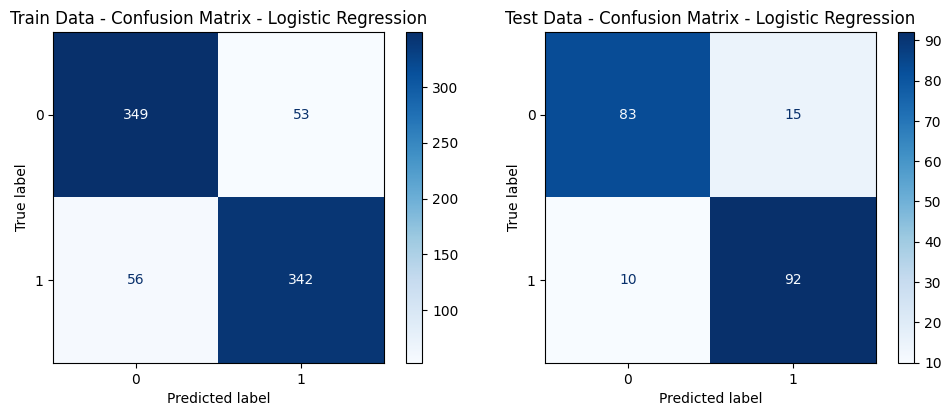

In [26]:
# Evaluate model
accuracy_regression, f1_Regression = evaluate_model(logistic_regression_model, "Logistic Regression", X_train, y_train, X_test, y_test)

K-Nearest Neighbors Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       402
           1       0.97      0.97      0.97       398

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800


K-Nearest Neighbors Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.97      0.98      0.98       102

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200


K-Nearest Neighbors Test Accuracy: 0.9750
K-Nearest Neighbors Test F1 Score: 0.9750


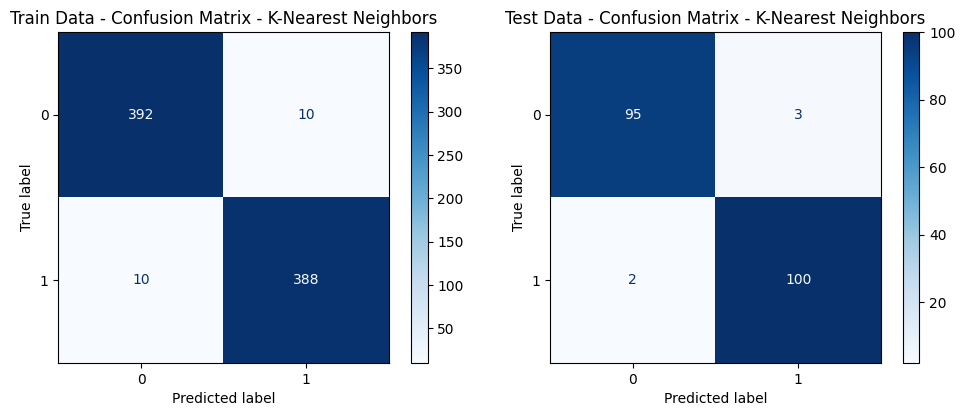

In [27]:
accuracy_knn, f1_knn = evaluate_model(knn_model, "K-Nearest Neighbors", X_train, y_train, X_test, y_test)

DecisionTree Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       402
           1       0.88      0.95      0.92       398

    accuracy                           0.91       800
   macro avg       0.92      0.91      0.91       800
weighted avg       0.92      0.91      0.91       800


DecisionTree Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.86      0.91        98
           1       0.88      0.98      0.93       102

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.92      0.92       200


DecisionTree Test Accuracy: 0.9200
DecisionTree Test F1 Score: 0.9196


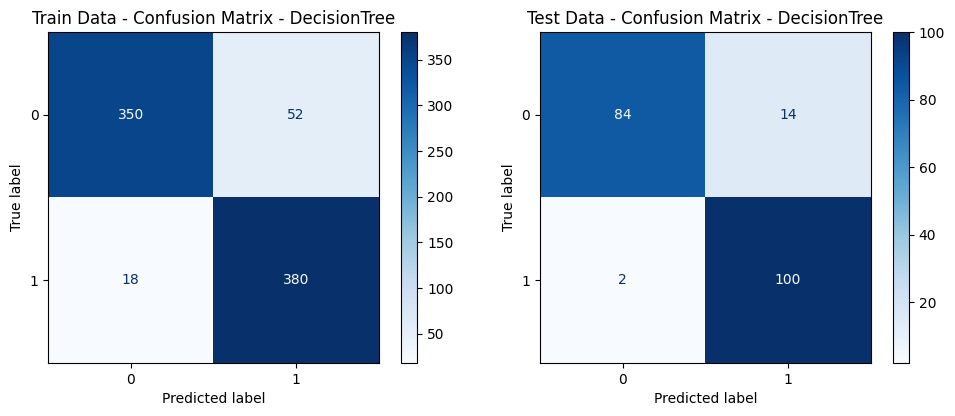

In [28]:
accuracy_DecisionTree, f1_DecisionTree = evaluate_model(decision_tree_model, "DecisionTree", X_train, y_train, X_test, y_test)

Random Forest Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       402
           1       0.96      0.97      0.97       398

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800


Random Forest Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        98
           1       0.97      0.99      0.98       102

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200


Random Forest Test Accuracy: 0.9800
Random Forest Test F1 Score: 0.9800


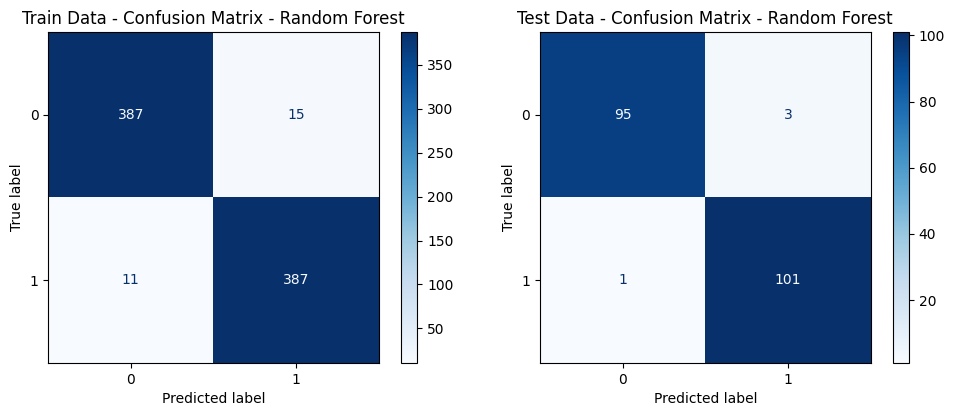

In [29]:
accuracy_random_forest, f1_random_forest = evaluate_model(random_forest_model, "Random Forest", X_train, y_train, X_test, y_test)

SVM with sigmoid Kernel Classification Report - Training Data
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       402
           1       0.66      0.66      0.66       398

    accuracy                           0.67       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.67      0.66       800


SVM with sigmoid Kernel Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        98
           1       0.65      0.67      0.66       102

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200


SVM with sigmoid Kernel Test Accuracy: 0.6500
SVM with sigmoid Kernel Test F1 Score: 0.6499


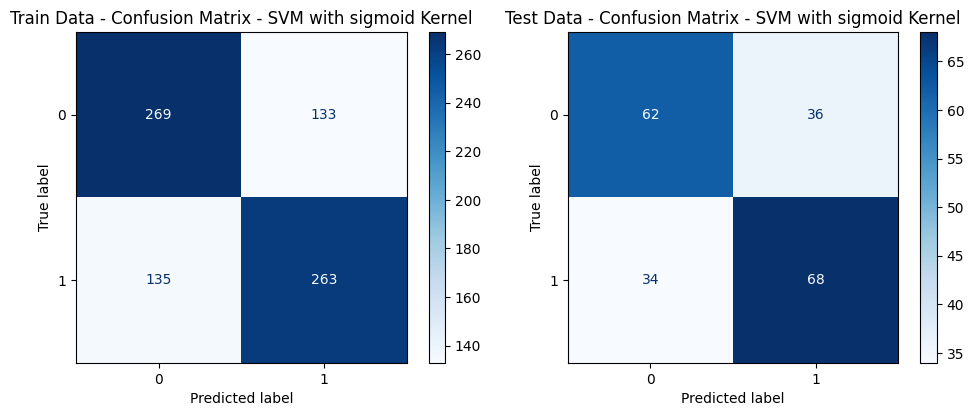

In [30]:
accuracy_svm, f1_svm = evaluate_model(svc_model, "SVM with sigmoid Kernel", X_train, y_train, X_test, y_test)

<font size=3 color='red'><b>Instruction:</b></font> Create a bar chart to compare the accuracy scores of the models you evaluated.

Prepare Data:
- Create a list of model names (e.g., ['logistic', 'KNeighbors', 'DecisionTree', 'RandomForest', 'svc_model']).
- Store the accuracy scores for each model in a corresponding list (e.g., [accuracy_regression, accuracy_knn, accuracy_DecisionTree, accuracy_random_forest, accuracy_svm]).

than Plot the Bar Chart

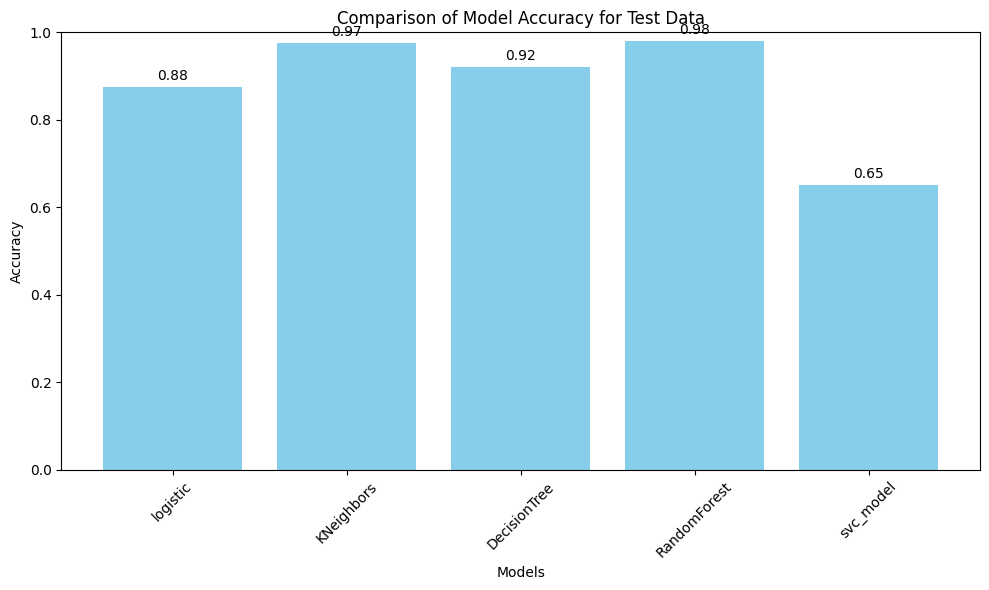

In [31]:
import matplotlib.pyplot as plt

model_names = ['logistic', 'KNeighbors', 'DecisionTree', 'RandomForest', 'svc_model']
accuracy_scores = [accuracy_regression, accuracy_knn, accuracy_DecisionTree, accuracy_random_forest, accuracy_svm]

# Plotting
plt.figure(figsize=(10, 6))
bars =plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy for Test Data')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


<font size=3 color='red'><b>Instruction:</b></font> Create a bar chart to compare the f1 scores of the models you evaluated.

Prepare Data:
- Create a list of model names (e.g., ['logistic', 'KNeighbors', 'DecisionTree', 'RandomForest', 'svc_model']).
- Store the accuracy scores for each model in a corresponding list (e.g., [f1_regression, f1_knn, f1_DecisionTree, f1_random_forest, f1_svm]).

than Plot the Bar Chart

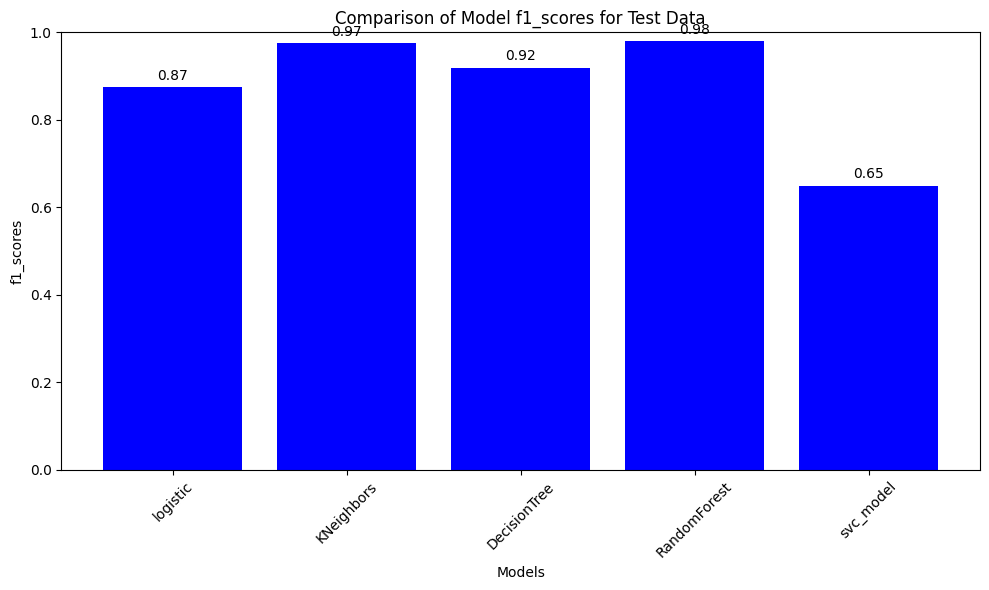

In [32]:
import matplotlib.pyplot as plt

# Assuming you have lists of model names and their corresponding accuracy scores
model_names = ['logistic', 'KNeighbors', 'DecisionTree', 'RandomForest', 'svc_model']
f1_scores = [f1_Regression, f1_knn, f1_DecisionTree , f1_random_forest, f1_svm]

# Plotting
plt.figure(figsize=(10, 6))
bars =plt.bar(model_names, f1_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('f1_scores')
plt.title('Comparison of Model f1_scores for Test Data')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add accuracy values on top of each bar
for bar, f1_scores in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{f1_scores:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 2. experience with different dataset

- Switch to a different dataset
- View the dataset. How's it different from the previous one?
- Think - which models can fit this data appropriately?
- Switch between the models to test their performance on the dataset.
- Which were the best? The worst? Do you understand why?

### Exercise: the effect of train-size

**Why is it important?**

In a realistic scenerario, we might not have enough labeled examples.

It might be helpful to assess model's performance with respect to train-set size, so you can estimate how many labeled examples you would need to reach the desired performance.

Usually, with more labeled examples performance should increase following the law of diminishing returns.

**Exercise:**

- Choose any dataset(s) and model(s) of your choice.
- Generate multiple training datasets with increasing sizes (for example 10, 50, 100, 250, 500, 1000) and one fixed-sized (e.g. 1000) dataset for test. Test is fixed for a fair comparison between the different setups while we examing the effect of different train-sizes.
- Train and test the model on the different settings.
- Plot a graph of the performance over train-size.
- What can you learn from this, w.r.t to the different dataset(s) and model(s)?

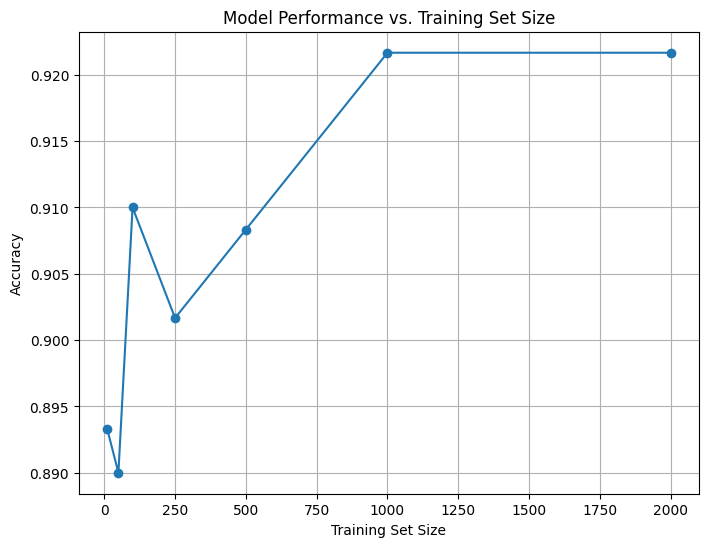

In [39]:
# Generate a dataset
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)

# Fixed test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define train sizes
train_sizes = [10, 50, 100, 250, 500, 1000, 2000]

# Initialize lists to store results
train_sizes_results = []
performance_results = []

# Model
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# Loop over different train sizes
for size in train_sizes:
    # Sample training data
    X_train = X_train_full[:size]
    y_train = y_train_full[:size]

    # Train model
    model.fit(X_train, y_train)

    # Test model
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    train_sizes_results.append(size)
    performance_results.append(accuracy)

# Plot performance vs. train size
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_results, performance_results, marker='o')
plt.title('Model Performance vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

<font size=3 color='red'><b>Instruction:</b></font> Perform hyperparameter tuning

- Keep working with the same dataset .
- Switch to SVM model.
- Play with its parameters: kernel, C.
- How do they impact the performance? Do you understand why?
- Play around to achieve best results (macro f1 score).
- Write your findings.
- Repeat the process above, this time with Decision Tree and play with its parameters: max_depth, min_samples_leaf, etc.


In [34]:
# Generate a dataset
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)

# Fixed test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
from sklearn.metrics import accuracy_score

# SVM Experimentation
svm_results = []
for kernel in ['linear', 'rbf']:
    for C in [0.1, 1, 10]:
        model = SVC(kernel=kernel, C=C, probability=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        svm_results.append((kernel, C, acc))

# Decision Tree Experimentation
dt_results = []
for max_depth in [3, 5, 10]:
    for min_samples_leaf in [1, 5, 10]:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        dt_results.append((max_depth, min_samples_leaf, acc))


In [36]:
# Consolidate results
svm_df = pd.DataFrame(svm_results, columns=['Kernel', 'C', 'Macro F1 Score'])
dt_df = pd.DataFrame(dt_results, columns=['Max Depth', 'Min Samples Leaf', 'Macro F1 Score'])

# Display results for SVM
print("SVM Results")
print(svm_df)

# Display results for Decision Tree
print("\nDecision Tree Results")
print(dt_df)




SVM Results
   Kernel     C  Macro F1 Score
0  linear   0.1        0.901667
1  linear   1.0        0.901667
2  linear  10.0        0.901667
3     rbf   0.1        0.901667
4     rbf   1.0        0.898333
5     rbf  10.0        0.883333

Decision Tree Results
   Max Depth  Min Samples Leaf  Macro F1 Score
0          3                 1        0.878333
1          3                 5        0.876667
2          3                10        0.873333
3          5                 1        0.895000
4          5                 5        0.896667
5          5                10        0.906667
6         10                 1        0.900000
7         10                 5        0.903333
8         10                10        0.908333
